# 프로젝트 (1) 손글씨 분류하기

아까 노드에서 0과 3으로 분류했던 손글씨 이미지를 0~9까지 분류해 보도록 합시다.
## (1) 필요한 모듈 import

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

알파벳 데이터를 불러오기 위한 load_digits, 알파벳 데이터를 트레이닝, 테스트 데이터셋으로 나누기 위한 train_test_split, 모델 평가를 위한 classification_report를 불러와 줍니다.  
추가적으로, 불러온 데이터를 여러 학습 모델에 적용시켜 비교해 볼 것이기 때문에 노드에서 배운 5가지 학습 모델을 불러왔습니다.  
  

## (2) 데이터 준비

In [2]:
digits = load_digits()

In [3]:
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


정상적으로 digits 데이터를 불러왔습니다. 이제 불러온 데이터를 살펴보겠습니다.

## (3) 데이터 이해하기

아까 digits 데이터가 잘 읽어졌는지 확인할 때 dir로 데이터 안에 DESCR, data, feature_names, frame, images, target, target_names 총 7개의 정보가 담겨있는 것을 확인하였습니다.  
일단 DESCR에 있는 데이터 정보를 확인해 보겠습니다.

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

digits.data로 데이터를 확인해보니 수많은 배열이 나오네요.  
해당 데이터의 shape 속성으로 배열의 모양을 확인해 봅시다.

In [6]:
digits.data.shape

(1797, 64)

64개의 숫자로 이루어진 1797개의 데이터라는 것을 확인할 수 있습니다.  
64개의 숫자 배열은 8x8 크기의 손글씨 이미지를 1차원 배열로 표현해 둔 것이라고 합니다.  
Image를 확인해 보고 싶은데 어떻게 해야 할까요.. matplotlib를 이용하면 이미지를 표현할 수 있다고 하네요.  
아까 import하지 않았던 모듈이라 참조 후에 image를 표현해 보도록 하겠습니다.

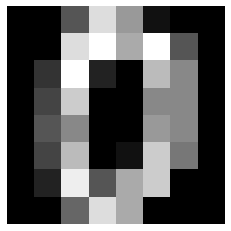

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray') # 1차원 배열을 8x8로 다시 표현하여 컬러맵 gray를 사용해 표시
plt.axis('off') # 축 표시x
plt.show()

첫번째 데이터는 숫자 0을 표시한 것이었네요. 이번에는 다양한 Feature는 없고 이 64개의 숫자 배열을 학습시켜 원하는 답을 얻어낼 수 있는지 확인해 보겠습니다. 그러기 위해서는 일단 데이터를 분류해줘야 합니다.  
학습시킬 데이터는 digits.data인 것 같고.. 정답은 어디에 있을까요?

In [8]:
print(len(digits.target))
digits.target

1797


array([0, 1, 2, ..., 8, 9, 8])

음.. 뭔가 0 ~ 9 의 숫자로 표현된 것 같긴한데 중간이 생략되어 보여서 확실하지가 않네요.  
하지만 target_names를 확인하면 target이 어떻게 구성되어 있는지 알 수 있습니다.

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

digits.target의 데이터가 정답을 담고 있는 것 같네요. 해당 데이터들을 변수에 담아둡시다.

In [10]:
digit_data = digits.data
digit_label = digits.target

이제 학습할 데이터와 정답지가 준비되었습니다. 다음으로 넘어가 보겠습니다.

## (4) train, test 데이터 분리  
모델 학습을 통해 훈련을 하게되면 우리는 테스트 데이터를 통해 해당 학습이 얼마나 잘 되었는가를 평가할 수 있다. 하지만 우리에게 준비된 데이터셋은 하나뿐이다.   
훈련에 사용했던 데이터를 테스트에 사용하게 되면 마치 이미 풀어본 문제를 다시 풀라고 시키는 (당연히 맞추겠지) 행위가 되기 때문에 우리는 훈련용 데이터를 분리해서 학습이 잘 되었는지 평가를 할 것이다. 그리고 그것을 분리하는 것은 앞에서 참조한 sklearn.model_selection의 train_test_split 함수를 통해 아주 쉽게 할 수 있다.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digit_data,
                                                    digit_label, 
                                                    test_size=0.2, 
                                                    random_state=22)

X_train, X_test에는 각각 학습할 데이터와 답을 맞추는데 사용할 테스트 데이터가 들어가게 되고 y_train, y_test에는 학습에 사용될 정답과 테스트 데이터의 정답여부를 판단할 target data가 들어가게 된다.  
test_size를 지정하면 해당 크기만큼 test 데이터로 가져가고 나머지는 훈련용 데이터에 들어가게 된다.

## (5) 다양한 모델로 학습시켜보기  
이제 훈련 데이터와 테스트 데이터가 모두 준비되었으니 학습을 시켜보자. 앞에서 언급했듯이, 5가지 모델을 전부 실행해보고 성능을 비교해 볼것이다.  
각 모델의 사용법은 간단하다. sklearn에서 참조한 각 모델의 Classifier를 이용해 데이터를 세팅해주고 학습시킨 후 테스트 데이터로 평가를 진행한다.

### Decision Tree  
Decision Tree는 데이터를 분석하여 각 특징들을 이진분류하여 스무고개처럼 각 특징들에 대해 분류된 질문을 따라 내려가서 답을 찾는 모델입니다.  
특징이 여러개일 수록 뻗어나가는 질문들이 가지와 같다고 하여 의사결정나무 라고 합니다.

In [12]:
decision_tree = DecisionTreeClassifier(random_state=20)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=20)

학습이 끝났습니다. 정말 간단하네요.  
아까 train 데이터와 test 데이터를 구분할 때도 사용했던 random_state가 신경쓰이네요.  
컴퓨터가 랜덤한 값을 생성할 때 나름의 규칙을 통해 생성하기 때문에 완전히 랜덤한 값을 생성하는 것이 아닙니다. random_state를 지정해주게 되면 랜덤으로 나오게 되는 값이 항상 같은 규칙으로 동작하여 같은 값을 리턴한다고 합니다.  
그럼 학습된 모델이 얼마나 정답을 잘 맞추나 봅시다.


In [13]:
y_pred = decision_tree.predict(X_test)

y_pred에는 테스트 데이터를 기반으로 학습된 모델에서 정답을 예측하게 됩니다.  
학습을 평가하는 데는 sklearn.metrics의 classification_report 함수를 사용합니다.

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.75      0.82      0.79        40
           2       0.87      0.82      0.84        33
           3       0.83      0.87      0.85        39
           4       0.83      0.80      0.81        44
           5       0.88      0.83      0.86        36
           6       0.84      0.87      0.86        31
           7       0.84      0.87      0.85        30
           8       0.89      0.82      0.86        40
           9       0.83      0.86      0.85        35

    accuracy                           0.85       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.85      0.85      0.85       360



오.. 뭔가 많은 결과값이 나왔네요.  
하지만 아직 우리는 4개의 모델을 더 학습시켜봐야 합니다.  
모델별로 y_pred를 구분하여 모델 평가지표에 대해 알아보고 나중에 비교해 보도록 합시다.

In [15]:
y_pred_decision_tree = decision_tree.predict(X_test)

### Random Forest  
랜덤포레스트는 의사결정트리의 단점을 보완한 학습모델입니다. 의사결정트리는 각 특징에 대해 이진분류를 하기 때문에 결정경계가 수직이어서 특정 데이터에만 잘 동작할 가능성이 높습니다.  
랜덤포레스트는 의사결정트리를 여러개 사용해서 그 단점을 보완했습니다. 근데 이름에 랜덤이 들어가네요? 왜 랜덤이냐면 의사결정트리를 여러개 사용할 때 이진분류할 특징을 랜덤으로 골라서 사용하기 때문입니다.  
이런식으로, 어떤 모델의 단점을 보완하기 위해 여러 모델을 합쳐서 사용하는 것을 앙상블(Ensemble)이라고 합니다.  
랜덤포레스트 모델을 적용해 학습을 시키고 예측값을 y_pred_random_forest에 저장하겠습니다.

In [16]:
random_forest = RandomForestClassifier(random_state=20)
random_forest.fit(X_train, y_train)
y_pred_random_porest = random_forest.predict(X_test)

### Support Vector Machine(SVM)  
SVM은 Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행하는 선형 분류 알고리즘입니다.  
흠.. 근데 우리는 0-9를 구분해야 하는데 선형 분류 알고리즘은 데이터를 두가지로 밖에 분류할 수 없지 않나.. 하겠지만 SVM은 다중 클래스 분류를 할 때 각 클래스를 다른 모든 클래스와 분류하도록 분류 모델을 여러개 만들게 됩니다. 0-9니까 분류모델이 10개 만들어지겠네요. 그리고 예측시에 모든 모델이 작동하여 가장 높은 점수를 내는 모델의 클래스를 예측 값으로 선택한다고 합니다.  
일단 써봅시다.

In [17]:
svm_model = svm.SVC(random_state=20)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

### Stochastic Gradient Descent Classifier (SGDClassifier)  
SGD는 확률적 경사하강법으로 데이터 세트에서 무작위로 균일하게 선택한 하나의 데이터 포인트를 이용하여 각 단계의 예측 경사를 계산하는 모델입니다. 솔직히 완벽하게 이해하지 못해서 더 자세히 공부해보고 회고에서 다루도록 하겠습니다.  
결과를 뽑아봅시다.


In [18]:
sgd_model = SGDClassifier(random_state=20)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

### Logistic Regression  
Logistic Regression 모델은 가장 널리 알려진 선형 분류 알고리즘입니다. 소프트맥스 함수를 사용한 다중 클래스 분류 알고리즘으로 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀라고도 표현하지만, 분류를 수행합니다.  
소프트맥스 함수는 분류될 클래스가 N개일 때, N차원의 벡터로 각 클래스가 정답일 확률을 표현하도록 정규화하는 함수입니다.  
해당 데이터에선 64개의 벡터를 입력받고 10개의 벡터에 각 클래스가 될 확률을 표현할 수 있도록 데이터 학습을 통해 가중치와 편향을 조정하는 과정을 1797회 거친다 라고 생각할 수 있겠네요. 가중치와 편향을 조정할 때는 예측값 벡터와 실제값 벡터를 비교하여 오차를 줄이는 방식으로 조정합니다.  
이것도 학습을 진행해 줍시다.

In [19]:
logistic_model = LogisticRegression(random_state=20, max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

logistic model을 학습하면서 오류가 발생했는데 무한 루프방지를 위한 max_iter 값이 기본으로 100으로 설정되어 있어서 반복횟수가 제한되어 발생하는 오류였다. max_iter를 조금씩 늘리다가 5000으로 설정하니 오류가 발생하지 않았다.

## (6) 모델을 평가해 보기  
5가지의 모델으로 모두 학습을 마치고 평가를위해 예측값을 각 변수에 담아두었습니다. 이제 모델이 잘 학습된건지 평가를 해봅시다.

In [20]:
print('Decision Tree : \n', classification_report(y_test, y_pred_decision_tree))
print('Random Forest : \n', classification_report(y_test, y_pred_random_porest))
print('SVM : \n', classification_report(y_test, y_pred_svm))
print('SGD : \n', classification_report(y_test, y_pred_sgd))
print('Logistic : \n', classification_report(y_test, y_pred_logistic))

Decision Tree : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.75      0.82      0.79        40
           2       0.87      0.82      0.84        33
           3       0.83      0.87      0.85        39
           4       0.83      0.80      0.81        44
           5       0.88      0.83      0.86        36
           6       0.84      0.87      0.86        31
           7       0.84      0.87      0.85        30
           8       0.89      0.82      0.86        40
           9       0.83      0.86      0.85        35

    accuracy                           0.85       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.85      0.85      0.85       360

Random Forest : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      1.00      0.98        40
           2       1.00      1.00      1.0

각 모델별 학습에 대한 예측 수치가 나타났습니다.  
Precision, Recall, F1 score는 오차행렬에서 표현되는 TP, FN, FP, TN으로 계산되는 성능 지표 중에 대표적으로 쓰이는 성능지표 입니다.
- TP(True Positive) : 맞는것을 잘 예측
- FN(False Negative) : 맞는것을 아니라고 잘못 예측
- FP(False Positive) : 아닌것을 맞다고 잘못 예측
- TN(True Negative) : 아닌것을 잘 예측  

Precision은 TP / (TP+FP)로 FP의 영향을 많이받는 정밀도 Recall은 TP / (TP+FN)으로 FN의 영향을 많이받는 재현율입니다.  
그러니까 Precision은 아닌것을 맞다고 잘못 예측하지 않아야 높게 나오고 Recall은 맞는것을 아니라고 잘못 예측하는 경우가 적어야 높게 나옵니다.  
필적을 맞추는 경우에야 맞는데 아니라고 하면 곤란하니 Recall이 높은게 더 중요하다고 생각할 수 있겠지만, 여기서는 크게 중요도가 느껴지지 않는 것 같다.  
그렇다면 정밀도와 재현율의 수치를 조합해서 종합적인 성능 평가 지표를 내는 F1 score가 높은 기준으로 모델을 평가해보자.  
Random Forest모델과 SVM 모델의 평가가 0.99로 동일하게 정말 좋다고 볼 수 있겠지만 SVM모델의 F1 score의 합이 Random Forest보다 0.3 높다.  
손글씨 이미지 학습의 우승자는 SVM이 차지했다!

# 프로젝트(2) 와인 분류하기

이번에는 sklearn의 load_wine()의 데이터로 와인을 종류를 분류해 봅시다.

## (1) 필요한 모듈 import하기

In [21]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

이전에 손글씨를 분류할 때 썼던 모듈을 불러옵니다.

(2) 데이터 준비  
모듈을 불러왔으면 load_wine 메소드를 통해 데이터를 가져옵니다.

In [22]:
wine = load_wine()

와인 데이터를 불러왔습니다. 이제 데이터를 살펴봅시다.

(3) 데이터 이해하기  
먼저, 아까 했던대로 데이터의 정보들을 조금 살펴봅시다.

In [23]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [24]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

와인에 대한 178개의 데이터가 담겨있습니다. 13개의 Feature를 가지고 3가지 클래스로 분류되네요.  
와인을 잘 몰라서 각 Feature가 무엇을 뜻하는지 자세히 모르겠기 때문에.. 모든 Feature를 학습시켜 주도록 합시다.  
wine 데이터와 정답지를 변수에 담아주도록 하겠습니다.


In [25]:
wine_data = wine.data
label_data = wine.target

## (4) train, test데이터 분리  
모델 학습용 데이터와 테스트 데이터를 분리해 주겠습니다.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, label_data, test_size=0.2, random_state=20)

## (5) 다양한 모델로 학습시켜보기  
아까 손글씨 데이터에 적용했던 대로 각 모델에 데이터를 학습시키고 비교할 수 있도록 예측값을 담겠습니다.

In [27]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=20)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

#Random Forest
random_forest = RandomForestClassifier(random_state=20)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

#SVM
svm_model = svm.SVC(random_state=20)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

#SGD
sgd_model = SGDClassifier(random_state=20)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

#Logistic Regression
logistic_model = LogisticRegression(random_state=20)
logistic_model.fit(X_train, y_train)
y_pred_logistic = sgd_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


이런.. SVM 모델에서 max_iter 값을 설정해 주지 않아서 또 오류가 발생했네요 max_iter값을 조정하여 다시 학습시켜 주겠습니다.

In [28]:
svm_model = svm.SVC(random_state=20, max_iter = 300)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

## (6) 모델을 평가해 보기  
이번 모델도 정밀도와 재현율의 중요도가 크게 구분되지는 않는것 같습니다. (제 뇌피셜..)  
그러니 이번에도 F1 score를 기준으로 모델을 평가해 보겠습니다.

In [29]:
print('Decision Tree : \n', classification_report(y_test, y_pred_decision_tree))
print('Random Forest : \n', classification_report(y_test, y_pred_random_forest))
print('SVM : \n', classification_report(y_test, y_pred_svm))
print('SGD : \n', classification_report(y_test, y_pred_sgd))
print('Logistic : \n', classification_report(y_test, y_pred_logistic))

Decision Tree : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        17
           2       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

Random Forest : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

SVM : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.71      0.71      0.71        17
           2       0.44      0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

오.. 랜덤포레스트 모델이 압도적인 성능을 보이네요. SGD와 Logistic 모델은 random_state를 바꿔가며 돌려보았지만 2클래스는 전혀 구분하지 못하는 모습을 보입니다.  
wine 분류 모델의 우승자는 랜덤 포레스트네요!

# (3) 유방암 여부 진단하기  
마지막입니다. 유방암 여부를 진단해 보도록 하죠.

## (1) 필요한 모듈 import하기  
마찬가지로 학습과 평가에 관련된 모듈들을 import해줍니다.

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## (2) 데이터 준비   
sklearn.datasets의 유방암 관련 데이터를 받아오도록 합시다.

In [31]:
breast_cancer = load_breast_cancer()

## (3) 데이터 이해하기  
breast_cancer의 데이터를 한번 확인해 보겠습니다.

In [32]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [33]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

30가지의 feature를 가지는 569개의 데이터를 가지고 있네요.  
클래스는 양성과 음성 두가지로 구분되는 듯 합니다. 학습을 위해 데이터를 변수에 담아보겠습니다.  
이번엔 변수가 너무 길어질 것 같으니 훈련용 데이터라는 의미로 train_data 변수를 사용하겠습니다.

In [34]:
train_data = breast_cancer.data
label_data = breast_cancer.target

## (4) train, test 데이터 분리  
이제 학습용 데이터와 테스트용 데이터로 다시 분리해 주겠습니다.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train_data, label_data, test_size=0.2, random_state=20)

(5) 다양한 모델로 학습시켜보기  
분류된 데이터를 각 모델에 적용해보겠습니다. 이번엔 SVM 모델에 max_iter까지 넉넉하게 적용하여 오류가 안나도록 해보겠습니다.

In [36]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=20)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

#Random Forest
random_forest = RandomForestClassifier(random_state=20)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

#SVM
svm_model = svm.SVC(random_state=20, max_iter=1000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

#SGD
sgd_model = SGDClassifier(random_state=20)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

#Logistic Regression
logistic_model = LogisticRegression(random_state=20)
logistic_model.fit(X_train, y_train)
y_pred_logistic = sgd_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


.... SVM에 max_iter를 적용해 줬더니 이번엔 Logistic 모델에서 max_iter 관련 오류가 발생하네요.. 값을 조정해 다시 학습을 진행해 줍니다.

In [37]:
#Logistic Regression
logistic_model = LogisticRegression(random_state=20, max_iter=2000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = sgd_model.predict(X_test)

## (6) 모델을 평가해 보기
다시 모델을 평가해봅시다.

In [38]:
print('Decision Tree : \n', classification_report(y_test, y_pred_decision_tree))
print('Random Forest : \n', classification_report(y_test, y_pred_random_forest))
print('SVM : \n', classification_report(y_test, y_pred_svm))
print('SGD : \n', classification_report(y_test, y_pred_sgd))
print('Logistic : \n', classification_report(y_test, y_pred_logistic))

Decision Tree : 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.94      0.97      0.96        66

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

Random Forest : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

SVM : 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        48
           1       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0

여태까지는 정밀도와 재현율이 크게 상관없어 두 지표를 모두 계산하는 F1 score로 모델을 평가했지만 암을 진단하는 경우에는 얘기가 조금 달라집니다.  
만약 양성 환자인데 음성이라고 판단해버려서 병을 놓치게 되면 큰일이니까요. 그런 면에서 FN(False Negative)의 영향이 크게 작용하는 Recall 지표가 큰 값이 더 좋은 모델이라고 생각할 수 있습니다.  
그런데 굳이 recall을 보지 않더라도 랜덤포레스트의 평가수치가 다른 모델에 비해 더 좋아보이네요.  
이번에도 랜덤포레스트 모델이 우승입니다.

# (4) 회고  
이번 Exploration 노드를 진행하면서 여러 데이터를 사용하여 데이터를 확인하는 법과 데이터를 학습시키는 모델에 대해 알아보았다.  
캐글 필사에서 그냥 시켜서 랜덤포레스트가 어떤건지 대충 알고 사용했었는데 이번에 다양한 모델을 공부해보고 다양한 데이터에 모델을 적용해 보니 왜 타이타닉 필사에서 랜덤포레스트를 사용했는지 알겠다.  의사결정트리의 단점을 보완해서인지 모두 좋은 평가값이 나오는 것을 확인할 수 있었다.  
SGD에 대해서는 조금 더 짚고 넘어가고 싶은데 경사 하강법이라는 개념 자체가 아직 머릿속에 정리가 되지 않아서 조금 더 공부를 해봐야 할 것 같다.  
SVM은 손글씨 구분에서는 좋은 성능을 보였지만 나머지 두 데이터에서는 비교적 낮은 성능을 보였는데, 아무래도 학습을 통해 각 클래스에 해당하는 확률 오차를 계속 줄여가는 학습 모델이다 보니 데이터가 더 많을때 유리한 모습을 보인게 아닌가 하는 생각이 들기도 한다.  
와인 데이터에서 SGD와 Logistic 모델이 2클래스 데이터를 전혀 분류하지 못해서 random_state를 바꾸어가며 실행해 봤는데 여전히 잘 되지 않아서 train_test_split의 state값도 변경해 봤는데 여전히 0이 나왔다. 다른 조원들이 한거나 인터넷 글들을 찾아보면 SGD에서의 2클래스 분류는 0이지만 Logistic에서는 잘 분류하던데 이상하다..